In [97]:
# import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import f_oneway, normaltest
from statsmodels.stats.multicomp import pairwise_tukeyhsd
# set up matplotlib
%matplotlib inline

The standard data science steps are: gather, assess, clean, analyze, model, visualize

In [2]:
# Gather the data. Here we are using airbnb data for the city of Bristol, UK.
listings_df=pd.read_csv('./listings.csv') 
cal_df=pd.read_csv('./calendar.csv')
rev_df=pd.read_csv('./reviews.csv')
neigh_df=pd.read_csv('./neighbourhoods.csv')

We will start by looking at the 'listings' dataset, to get an idea of where the rentals are located.

In [279]:
#Assess the dataset: look at shape, column headings and missing values

print(f"The size of the listings dataframe is: {listings_df.shape}")
listings_df.head(5)

The size of the listings dataframe is: (2260, 75)


,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,70820,https://www.airbnb.com/rooms/70820,20221228025809,2022-12-28,previous scrape,City View - Sarah's double room.,A good sized room with a comfy double bed and ...,The neighbourhood is friendly and welcoming; m...,https://a0.muscache.com/pictures/b33c30be-56a0...,360195,...,4.94,4.75,4.77,NaN,f,5,0,5,0,1.60
1,117122,https://www.airbnb.com/rooms/117122,20221228025809,2022-12-28,city scrape,City Centre-Waterside Retreat,My Harbourside apartment centrally located min...,This area is on the water and has splendid vie...,https://a0.muscache.com/pictures/f6d39021-af07...,591555,...,4.99,4.97,4.88,NaN,f,1,0,1,0,1.23
2,176306,https://www.airbnb.com/rooms/176306,20221228025809,2022-12-28,city scrape,The White Room - Central Bristol Art House Ga...,"A small double room in an artist's house, with...","Southville is pretty darn hip, frankly. North ...",https://a0.muscache.com/pictures/e1e7fdfc-9db5...,708175,...,4.92,4.72,4.67,NaN,f,1,0,1,0,0.35
3,307634,https://www.airbnb.com/rooms/307634,20221228025809,2022-12-28,city scrape,"'The Sunset Room' Peaceful, Clear Home","Close to Bristol and Bath Railway Path, leadin...",Located in the cosmopolitan and bohemian commu...,https://a0.muscache.com/pictures/e9a6cc15-b2ea...,1582810,...,4.75,4.79,4.61,NaN,f,3,1,2,0,0.46
4,341227,https://www.airbnb.com/rooms/341227,20221228025809,2022-12-28,city scrape,Listed Georgian house in the heart of Bristol.,This is a unique home in the heart of Montpeli...,"Shabby and authentic and still not gentrified,...",https://a0.muscache.com/pictures/43731fbe-289d...,237360,...,4.96,4.83,4.73,NaN,f,1,1,0,0,0.84


In [319]:
#which columns have missing values
print(f"These columns have at least one missing value: \n {listings_df.columns[listings_df.isna().any()].tolist()} \n")

#which columns have more than 25% missing
print(f"These columns have more than 25% of values missing: \n {listings_df.columns[listings_df.isna().mean()> 0.25].tolist()}")

These columns have at least one missing value: 
 ['description', 'neighborhood_overview', 'host_location', 'host_about', 'host_response_time', 'host_response_rate', 'host_acceptance_rate', 'host_neighbourhood', 'neighbourhood', 'neighbourhood_group_cleansed', 'bathrooms', 'bathrooms_text', 'bedrooms', 'beds', 'calendar_updated', 'first_review', 'last_review', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value', 'license', 'reviews_per_month'] 

These columns have more than 25% of values missing: 
 ['neighborhood_overview', 'host_about', 'host_neighbourhood', 'neighbourhood', 'neighbourhood_group_cleansed', 'bathrooms', 'calendar_updated', 'license']


In [3]:
#The field 'neighbourhood cleansed' has no missing values. Let's use it to look at where the
#majority of the rentals are
neighs=listings_df['neighbourhood_cleansed'].value_counts().index[0:15]
totals=listings_df['neighbourhood_cleansed'].value_counts().values[0:15]


<BarContainer object of 15 artists>

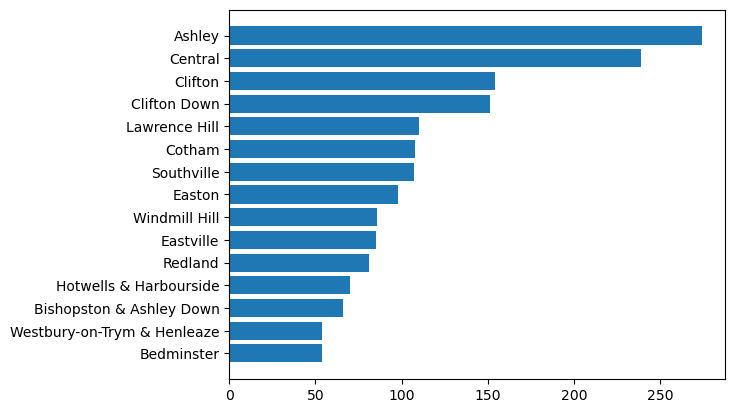

In [53]:
plt.barh(np.flipud(neighs), np.flipud(totals))

In [5]:
#This doesnt take account of the fact that some hosts have multiple listings. Let's try counting them up using 
#the 'calculated_host_listings_count' columns - which reflects the number of listings the user has. Of course, we 
#have to assume that the listings are all in the same neighbourhood reported by the 'neighbourhood' cleansed column

In [50]:
num_multi_listings=np.sum((listings_df.calculated_host_listings_count)>1)

print(f"The number of hosts with multiple listings is {num_multi_listings} out of {listings_df.shape[0]}")
 #true_neighbourhood_list=count_neighbourhood_listings(listings_df['neighbourhood_cleansed'], listings_df['calculated_host_listings_count'])
true_neighbourhood_list=np.repeat(listings_df['neighbourhood_cleansed'], listings_df['calculated_host_listings_count'])
neighs, counts=np.unique(true_neighbourhood_list, return_counts=True)
df=pd.DataFrame()
df['neigh']=neighs
df['count']=counts


The number of hosts with multiple listings is 1167 out of 2260


<BarContainer object of 10 artists>

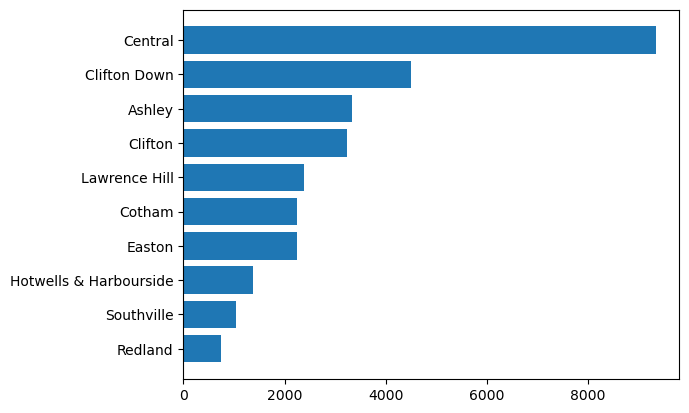

In [51]:
neighbourhood_sorted=df.sort_values(by='count', ascending=False)

plt.barh(np.flipud(neighbourhood_sorted['neigh'][0:10]), np.flipud(neighbourhood_sorted['count'][0:10]))


We can see that in fact the 'Central' region has by far the most individual rentals

Do visitors prefer staying in one region over another? Let's look to see whether there is actually any difference between the location ratings for the top 5 areas

In [317]:
#First let's check whether there are missing values in the location ratings column 

listings_df['review_scores_location'].isnull().sum()/listings_df.shape[0]


0       False
1       False
2       False
3       False
4       False
        ...  
2255    False
2256    False
2257    False
2258    False
2259    False
Name: neighbourhood_cleansed, Length: 2260, dtype: bool

That's not too bad, there are still around 2000 ratings to use. Let's discard the rows with a 'nan' for 
location rating, and then look at the differences between ratings in each area.

Mean neighbourhood review scores: neighbourhood_cleansed
Clifton Down              4.899191
Clifton                   4.894789
Cotham                    4.866800
Redland                   4.852222
Southville                4.845833
Hotwells & Harbourside    4.843182
Central                   4.834161
Ashley                    4.760315
Easton                    4.602614
Lawrence Hill             4.481414
Name: review_scores_location, dtype: float64 
 


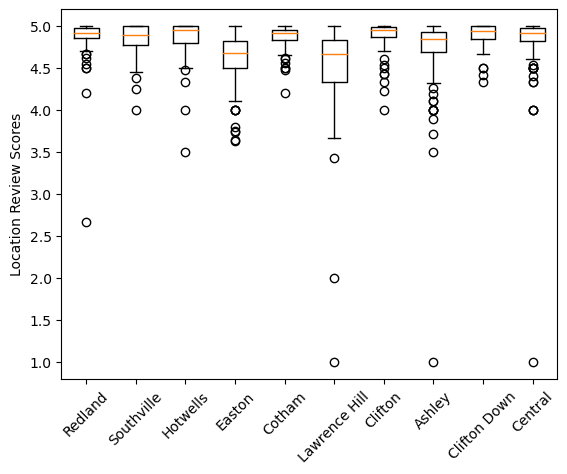

In [262]:
#Create a new dataframe, dropping the rows with null entries for the location review, and only including
#our top 5 neighbourhoods and the two columns of interest

location_df=listings_df.dropna(subset=['review_scores_location'])
location_df=location_df[['review_scores_location', 'neighbourhood_cleansed']]

top_10_neighbourhoods=np.flipud(neighbourhood_sorted['neigh'][0:10]).tolist()

location_df=location_df[location_df['neighbourhood_cleansed'].isin(top_10_neighbourhoods)]

mean_scores=location_df.groupby('neighbourhood_cleansed').mean().review_scores_location.sort_values(ascending=False)
print(f"Mean neighbourhood review scores: {mean_scores} \n ")    ;

#Let's pull out the 5 data sets of interest and plot some statistical measures. We will test for normality
#to see if we can use a one-way ANOVA to check for meaningful differences between the sets.
normal_p_scores={}
location_scores={}

for location in top_10_neighbourhoods:
    location_scores[location]=location_df['review_scores_location'][location_df['neighbourhood_cleansed']==location]
    normal_p_scores[location]=normaltest(location_scores[location])[1]

# Plot mean and inter-quartile range using a boxplot
x=[location_scores[top_10_neighbourhoods[n]] for n in np.arange(10)]
plt.boxplot(x)


#we will manually change the third entry as it's too long to look nice on the plot:
top_10=top_10_neighbourhoods
top_10[2]='Hotwells'
plt.xticks(list(np.arange(1,11,1)),top_10);
plt.xticks(rotation=45)
plt.ylabel('Location Review Scores');


These all look pretty similar - but it seems that Easton and Lawrence Hill  are lower than the rest. Is there any statistical difference between the groups?

In [273]:
if np.sum([p_vals<0.05 for p_vals in normal_p_scores.values()])==10:
    print('Scores are all normally distributed')
    
f_oneway(central_scores, cd_scores, ashley_scores, clifton_scores,lhill_scores)

# perform multiple pairwise comparison (Tukey HSD)
m_comp = pairwise_tukeyhsd(endog=location_df['review_scores_location'], groups=location_df['neighbourhood_cleansed'], alpha=0.05)
print(m_comp)

Scores are all normally distributed
                Multiple Comparison of Means - Tukey HSD, FWER=0.05                 
        group1                 group2         meandiff p-adj   lower   upper  reject
------------------------------------------------------------------------------------
                Ashley                Central   0.0738 0.3263 -0.0237  0.1714  False
                Ashley                Clifton   0.1345 0.0012  0.0331  0.2359   True
                Ashley           Clifton Down   0.1389 0.0008   0.036  0.2417   True
                Ashley                 Cotham   0.1065 0.0924 -0.0078  0.2208  False
                Ashley                 Easton  -0.1577 0.0013 -0.2774  -0.038   True
                Ashley Hotwells & Harbourside   0.0829 0.6246 -0.0509  0.2166  False
                Ashley          Lawrence Hill  -0.2789    0.0 -0.3936 -0.1642   True
                Ashley                Redland   0.0919 0.4201 -0.0373  0.2211  False
                Ashley       

This produces a horrible table, but you can see that both Easton and Lawrence Hill have a statistically lower rating than all other neighbourhoods (except each other)

You can also see that Southville, Redlands and Hotwells have high ratings, but are underrepresented in the listings - maybe there's a gap in the market here!

In [35]:
# Take an initial look at the data
cal_df.head()
cal_df[cal_df.available=='t']


,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
366,7746625,2022-12-29,t,$306.00,$306.00,3,10
367,7746625,2022-12-30,t,$306.00,$306.00,3,10
368,7746625,2022-12-31,t,$306.00,$306.00,3,10
369,7746625,2023-01-01,t,$306.00,$306.00,3,10
410,7746625,2023-02-11,t,$306.00,$306.00,3,10
...,...,...,...,...,...,...,...
824181,7738447,2023-02-02,t,$90.00,$90.00,25,35
824182,7738447,2023-02-03,t,$90.00,$90.00,25,35
824511,7738952,2022-12-29,t,$65.00,$65.00,2,4
824512,7738952,2022-12-30,t,$73.00,$73.00,2,4


In [16]:
listings_df.columns[listings_df.isnull().mean()>0]

listings_df.bathrooms.isnull().sum()

2260